In [1]:
import pandas as pd
df=pd.read_csv('companies.csv')
df.head()


permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code state_code                 region           city  \
0  operating          IND         16                 Mumbai         Mumbai   
1  operating          USA         DE             DE - Other  Delaware City   
2  operating          NaN        NaN                    NaN            NaN   
3  operating          CHN         22                Beijing        Beijing   
4  operating          USA         IL  Springfield, Illinois      Champaign   

   funding_rounds  founded_at first_funding_at last_funding_at  
0               1         NaN       2015-01-05      2015-01-05  
1               2  2014-09-04       2014-03-01      2014-10-14  
2               1         NaN       2014-01-30      2014-01-30  
3               1  2007-01-01       2008-03-19      2008-03-19  
4               1  2010-01-01       2014-07-24      2014-07-24

In [2]:
df.drop(['state_code', 'region'],axis=1,inplace=True)

In [3]:
df.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code           city  funding_rounds  founded_at  \
0  operating          IND         Mumbai               1         NaN   
1  operating          USA  Delaware City               2  2014-09-04   
2  operating          NaN            NaN               1         NaN   
3  operating          CHN        Beijing               1  2007-01-01   
4  operating          USA      Champaign               1  2010-01-01   

  first_funding_at last_funding_at  
0       2015-01-05      2015-01-05  
1       2014-03-01      2014-10-14  
2       2014-01-30      2014-01-30  
3       2008-03-19      2008-03-19  
4       2014-07-24      2014-07-24

Text(0.5, 1.0, 'status difference')

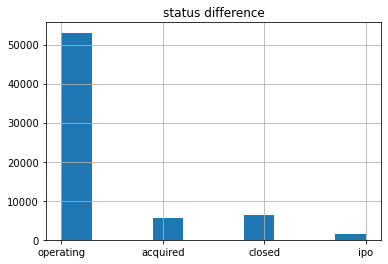

In [4]:
import matplotlib.pyplot as plt
df.status.hist()
plt.title('status difference')

As the histogram above shows, we have more companies operating as compared to acquired ones which would imply that they received far more funding and produced more than those which were acquired.

It's a method of starting a business by soliciting capital from family, friends, and investors in exchange for a portion of the company. We go to an investor bank and inform them about the idea or product to raise money for this company. They will then introduce us to institutional investors / people who are interested in this idea or product, and they will sell some of the business's shares to assist in bringing the company to the public market. This helps raise a lot of money, sell shares at a reasonable price that suits the shareholder, raise more money through additional rounds of investment, and promote the brand because IPOs deliver a good credibility boost.
The disadvantages include:
When it comes to matters like openness, the SEC (Securities and Exchange Commission is the US federal agency in charge of regulating and managing financial markets) and exchanges have stringent criteria. As a result, public firms are required to reveal a great deal of business-related information, which may result in competitors obtaining access to material that is the company's trade secret.
Less control as shareholders will now affect decision making.


In [5]:
operating=df.loc[df['status']=='operating']
operating.head()


permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code           city  funding_rounds  founded_at  \
0  operating          IND         Mumbai               1         NaN   
1  operating          USA  Delaware City               2  2014-09-04   
2  operating          NaN            NaN               1         NaN   
3  operating          CHN        Beijing               1  2007-01-01   
4  operating          USA      Champaign               1  2010-01-01   

  first_funding_at last_funding_at  
0       2015-01-05      2015-01-05  
1       2014-03-01      2014-10-14  
2       2014-01-30      2014-01-30  
3       2008-03-19      2008-03-19  
4       2014-07-24      2014-07-24

We'll now compare the funding rounds based on the status; whether it is operating, acquired or ipo

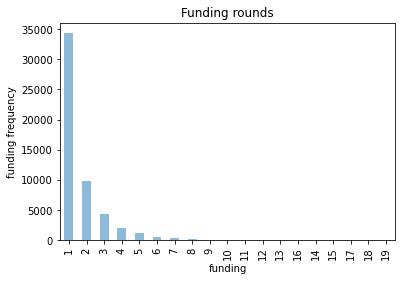

In [6]:

import matplotlib.pyplot as plt
operating.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

The above curve can be matched to the values below and we can deduce that operating companies get more one time funding rounds that two.

In [7]:
operating['funding_rounds'].value_counts()

1     34367
2      9871
3      4366
4      2066
5      1119
6       554
7       312
8       150
9        91
10       55
11       31
12       24
13       11
16        5
14        4
15        3
17        2
18        2
19        1
Name: funding_rounds, dtype: int64

No we will see how this differs from acquired companies.

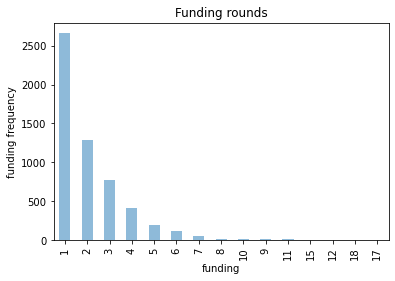

In [8]:
acquired=df.loc[df['status']=='acquired']

plt.title('funding rounds for aqcuired companies')
acquired.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

This can be confirmed and further understood with the values below.

In [9]:
acquired['funding_rounds'].value_counts()

1     2664
2     1287
3      772
4      411
5      194
6      115
7       54
8       15
10      13
9       11
11       9
15       1
12       1
18       1
17       1
Name: funding_rounds, dtype: int64

As we can see, both operating and acquired companies get more one time funding rounds than 2 with operating companies having by far the largest fundings. For IPO companies is illustrated below.

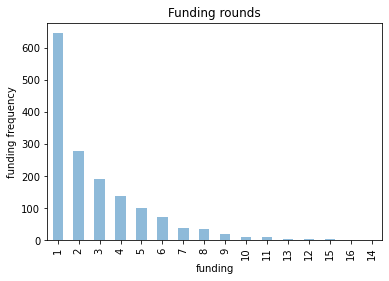

In [10]:
ipo=df.loc[df['status']=='ipo']

plt.title('funding rounds for IPO companies')
ipo.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

In [11]:
ipo['funding_rounds'].value_counts()

1     646
2     277
3     192
4     137
5     100
6      72
7      39
8      36
9      18
10     10
11      9
13      4
12      3
15      2
16      1
14      1
Name: funding_rounds, dtype: int64

We can conclude that operating companies exceed in founding rounds but all have higher one time fundings.

In [12]:
d=pd.read_csv('investments.csv')
d.head()


company_permalink        company_name company_category_list  \
0             /organization/0-6-com             0-6.com           Curated Web   
1    /organization/004-technologies    004 Technologies              Software   
2  /organization/01games-technology  01Games Technology                 Games   
3              /organization/0xdata              H2O.ai             Analytics   
4              /organization/0xdata              H2O.ai             Analytics   

  company_country_code company_state_code         company_region  \
0                  CHN                 22                Beijing   
1                  USA                 IL  Springfield, Illinois   
2                  HKG                NaN              Hong Kong   
3                  USA                 CA            SF Bay Area   
4                  USA                 CA            SF Bay Area   

    company_city                    investor_permalink  \
0        Beijing     /organization/dt-capital-partners   
1      Champaign       /organization/venturecapital-de   
2      Hong Kong     /organization/cyberport-hong-kong   
3  Mountain View             /organization/capital-one   
4  Mountain View  /organization/nexus-venture-partners   

            investor_name investor_country_code investor_state_code  \
0     DT Capital Partners                   CHN                  23   
1   VCDE Venture Partners                   DEU                   5   
2     Cyberport Hong Kong                   HKG                 NaN   
3             Capital One                   USA                  VA   
4  Nexus Venture Partners                   USA                  CA   

    investor_region investor_city  \
0          Shanghai      Shanghai   
1         Frankfurt     Frankfurt   
2         Hong Kong     Hong Kong   
3  Washington, D.C.        Mclean   
4       SF Bay Area    Menlo Park   

                           funding_round_permalink funding_round_type  \
0  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
1  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
2  /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
3  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
4  /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   

  funding_round_code   funded_at  raised_amount_usd  
0                  A  2008-03-19          2000000.0  
1                NaN  2014-07-24                NaN  
2                NaN  2014-07-01            41250.0  
3                  B  2015-11-09         20000000.0  
4                NaN  2013-05-22          3000000.0

In [13]:
d.drop([ 'company_state_code','company_region','investor_state_code','investor_region'],axis=1,inplace=True)
d['raised_amount_usd']=d['raised_amount_usd'].fillna("not available")
d['funding_round_code']=d['funding_round_code'].fillna("not available")
d['company_country_code']=d['company_country_code'].fillna("not provided")
d['investor_country_code']=d['investor_country_code'].fillna("not provided")
d.head()

company_permalink        company_name company_category_list  \
0             /organization/0-6-com             0-6.com           Curated Web   
1    /organization/004-technologies    004 Technologies              Software   
2  /organization/01games-technology  01Games Technology                 Games   
3              /organization/0xdata              H2O.ai             Analytics   
4              /organization/0xdata              H2O.ai             Analytics   

  company_country_code   company_city                    investor_permalink  \
0                  CHN        Beijing     /organization/dt-capital-partners   
1                  USA      Champaign       /organization/venturecapital-de   
2                  HKG      Hong Kong     /organization/cyberport-hong-kong   
3                  USA  Mountain View             /organization/capital-one   
4                  USA  Mountain View  /organization/nexus-venture-partners   

            investor_name investor_country_code investor_city  \
0     DT Capital Partners                   CHN      Shanghai   
1   VCDE Venture Partners                   DEU     Frankfurt   
2     Cyberport Hong Kong                   HKG     Hong Kong   
3             Capital One                   USA        Mclean   
4  Nexus Venture Partners                   USA    Menlo Park   

                           funding_round_permalink funding_round_type  \
0  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
1  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
2  /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
3  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
4  /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   

  funding_round_code   funded_at raised_amount_usd  
0                  A  2008-03-19         2000000.0  
1      not available  2014-07-24     not available  
2      not available  2014-07-01           41250.0  
3                  B  2015-11-09        20000000.0  
4      not available  2013-05-22         3000000.0

In [14]:
d.drop_duplicates(subset=['company_country_code'])

company_permalink                         company_name  \
0                  /organization/0-6-com                              0-6.com   
1         /organization/004-technologies                     004 Technologies   
2       /organization/01games-technology                   01Games Technology   
30             /organization/1-2-3-listo                          1,2,3 Listo   
38                 /organization/1000chi  Beijing 1000CHI Software Technology   
...                                  ...                                  ...   
143290               /organization/takas                                Takas   
156762             /organization/viadedo                              Viadedo   
159126            /organization/volubill                             VoluBill   
160652     /organization/wayne-trademark                      Wayne Trademark   
165581         /organization/yonderbound                          Yonderbound   

                         company_category_list company_country_code  \
0                                  Curated Web                  CHN   
1                                     Software                  USA   
2                                        Games                  HKG   
30                                  E-Commerce                  CHL   
38                                      Mobile         not provided   
...                                        ...                  ...   
143290  E-Commerce|Electronics|Internet|Retail                  LKA   
156762                          Transportation                  PRY   
159126                                Software                  MAF   
160652                                     NaN                  HND   
165581                                  Travel                  MCO   

       company_city                          investor_permalink  \
0           Beijing           /organization/dt-capital-partners   
1         Champaign             /organization/venturecapital-de   
2         Hong Kong           /organization/cyberport-hong-kong   
30       Las Condes                /organization/start-up-chile   
38              NaN                    /organization/sina-weibo   
...             ...                                         ...   
143290      Colombo           /organization/blue-ocean-ventures   
156762     Asunción                  /organization/carma-axlr8r   
159126      Marigot           /organization/argo-global-capital   
160652       Cortes  /organization/trinity-private-equity-group   
165581          NaN                /organization/metatronglobal   

                       investor_name investor_country_code investor_city  \
0                DT Capital Partners                   CHN      Shanghai   
1              VCDE Venture Partners                   DEU     Frankfurt   
2                Cyberport Hong Kong                   HKG     Hong Kong   
30                    Start-Up Chile                   CHL      Santiago   
38                        Sina Weibo                   CHN       Haidian   
...                              ...                   ...           ...   
143290           Blue Ocean Ventures                   CZE          Lkan   
156762                  Carma Axlr8r                   IRL          Cork   
159126           Argo Global Capital                   USA     Wakefield   
160652  Trinity Private Equity Group                   USA     Southlake   
165581               Metatron Global                   CZE        Prague   

                                funding_round_permalink funding_round_type  \
0       /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
1       /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
2       /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
30      /funding-round/6de4609e894495105bc791ed64361288               seed   
38      /funding-round/854fae13c5b26b2ea6b32b06c2e5890c              angel   
...        

In [15]:
d.drop_duplicates(subset=['investor_country_code'])

company_permalink        company_name  \
0                  /organization/0-6-com             0-6.com   
1         /organization/004-technologies    004 Technologies   
2       /organization/01games-technology  01Games Technology   
3                   /organization/0xdata              H2O.ai   
8                   /organization/0xdata              H2O.ai   
...                                  ...                 ...   
138692    /organization/st-barths-online    St Barths Online   
142915              /organization/t-zone              T-ZONE   
146357       /organization/the-influence       The Influence   
158613            /organization/vivareal            VivaReal   
160664      /organization/ways-of-eating      Ways of Eating   

                    company_category_list company_country_code   company_city  \
0                             Curated Web                  CHN        Beijing   
1                                Software                  USA      Champaign   
2                                   Games                  HKG      Hong Kong   
3                               Analytics                  USA  Mountain View   
8                               Analytics                  USA  Mountain View   
...                                   ...                  ...            ...   
138692                   Travel & Tourism                  BLM       Gustavia   
142915           E-Commerce|Manufacturing                  BGD          Dhaka   
146357    Advertising|Curated Web|Fashion                  GTM            NaN   
158613  Internet|Marketplaces|Real Estate         not provided            NaN   
160664              Apps|Fitness|Training         not provided            NaN   

                           investor_permalink            investor_name  \
0           /organization/dt-capital-partners      DT Capital Partners   
1             /organization/venturecapital-de    VCDE Venture Partners   
2           /organization/cyberport-hong-kong      Cyberport Hong Kong   
3                   /organization/capital-one              Capital One   
8       /organization/paxion-capital-partners  Paxion Capital Partners   
...                                       ...                      ...   
138692            /person/romain-garin-laurel      Romain Garin Laurel   
142915              /person/mahabubur-rahaman        Mahabubur Rahaman   
146357                /person/lucas-dougherty          Lucas Dougherty   
158613                  /person/simon-baker-4              Simon Baker   
160664                   /person/richard-koch             richard koch   

       investor_country_code investor_city  \
0                        CHN      Shanghai   
1                        DEU     Frankfurt   
2                        HKG     Hong Kong   
3                        USA        Mclean   
8               not provided           NaN   
...                      ...           ...   
138692                   BLM      Gustavia   
142915                   BGD         Dhaka   
146357                   GTM           NaN   
158613                   MCO           NaN   
160664                   GIB     Gibraltar   

                                funding_round_permalink funding_round_type  \
0       /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
1       /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
2       /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
3       /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
8       /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
...                                                 ...                ...   
138692  /funding-round/406025c5c61e3b1edd05f3a8a17bccaf              angel   
142915  /funding-round/05c7646d2cb0127d7f67c59d926c58f5               seed   
146357  /funding-round/7df080f3550e83e81b3faec18e2d5460              angel   
158613  /funding-round/4e5e4ab791e67542a2a04ee6bfa65485    

In [16]:
d.investor_country_code.value_counts()

USA             96341
not provided    30939
GBR              7616
DEU              3256
FRA              3007
                ...  
TTO                 1
MAR                 1
IRN                 1
BAH                 1
GIB                 1
Name: investor_country_code, Length: 99, dtype: int64

In [17]:
d.company_country_code.value_counts()

USA             112283
not provided     10521
GBR               8579
CAN               4009
CHN               3778
                 ...  
NPL                  1
MDA                  1
ALB                  1
GGY                  1
MCO                  1
Name: company_country_code, Length: 126, dtype: int64

The above data show that we have more investors in the USA and companies receiving investments as compared to othe countries.
But what about these companys speicalization as compared to investment?Which category (field) attracts more funding?  We will check for both dataframes(companies and investments)

In [22]:
df = df[df.category_list!= 'NaN']
df.category_list.value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

In [23]:
d = d[d.company_category_list!= 'NaN']
d.company_category_list.value_counts()

Biotechnology                                               10041
Software                                                     8931
Mobile                                                       3178
Enterprise Software                                          3002
E-Commerce                                                   2980
                                                            ...  
Curated Web|E-Commerce|Online Reservations|Online Travel        1
Hedge Funds|Market Research|Trading                             1
Curated Web|Home & Garden                                       1
E-Commerce|Furniture|Home & Garden|Lighting                     1
Consumer Goods|E-Commerce|Internet                              1
Name: company_category_list, Length: 19453, dtype: int64